<a href="https://colab.research.google.com/github/Akhil8252/pytorch_learning/blob/main/002_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### *follow "https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb"

In [ ]:
what_were_covering = {1: "data(prepare and load)",
                                        2: "build model",
                                        3: "fitting the model to the data (training)",
                                        4: "making predictions and evaluating a model(inference)",
                                        5:"saving and loading a model",
                                        6: " putting it all together"}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data (training)',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: ' putting it all together'}

In [ ]:
import torch
from torch import nn #nn contains all of pytorch's building blocks for neural networks
# follow pytorch documentation
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.1.0+cu121'

####step : 1
* data preparation and loading
        data can be almost anything in machine learning
                     excel spreadsheet
                     Images of any kind
                     videos (youtube has lots of data)
                     Audio (speeches)
                     DNA
                     Text
* Machine learning is a game of two parts
-- get data into a numerical representation
-- build a model to study the pattern in that numerical  representation

* to showcase this, let's create some *known* data using the linear regression formula
* we will use formula of linear regression formula to make a straight line with *known* **parameters**


In [ ]:
#create known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)# to make it a two dimensional tensor
X[:5]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])

In [ ]:
y = weight*X+bias
y[:5]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])

In [ ]:
len(X),len(y)

(50, 50)

##### splitting data into train and test sets
 `training set : - 60 to 80% ⏩ Always done`

`validation set :- 10 to 20% ⏩ often but not always`

`test set : - 10 to 20% ⏩always done `

let's create a training set and test set

In [ ]:
train_split = int(len(X)*0.8)

X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]

In [ ]:
len(X_train) ,len (y_train),len(X_test) ,len (y_test)

(40, 40, 10, 10)

how might we better visualize the data , this is where data exploration comes into picture

In [ ]:
def plot_prediction(train_data,train_labels,test_data,test_labels,predictions = None) :
  """
   plot training data and test data and compare predictions
  """
  plt.figure(figsize =(10,7) )
  #plot training data
  plt.scatter(train_data,train_labels,c = 'r',marker = '*', label = "training data", s = 50)
  plt.scatter(test_data,test_labels,c = 'g', marker = '.', label = "test data", s = 50)
  plt.legend()
  plt.show()


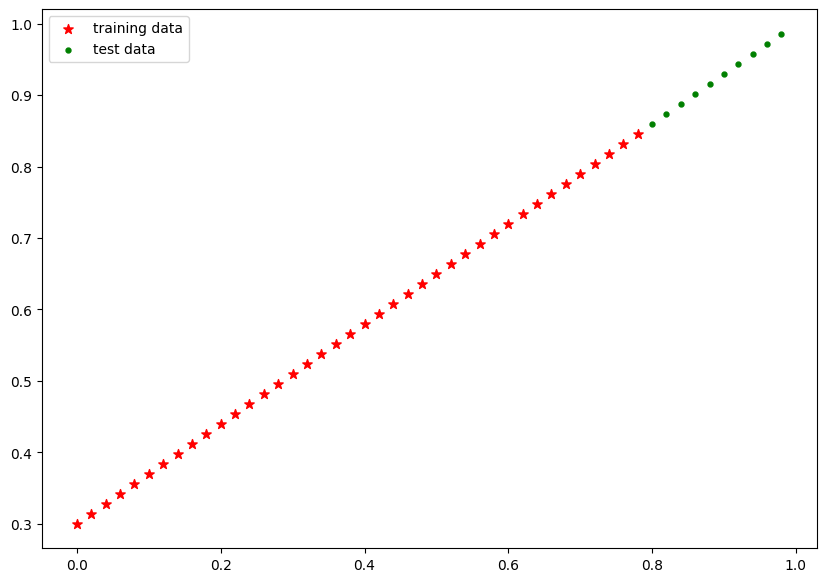

In [ ]:
plot_prediction(X_train,y_train,X_test,y_test)

building 1st pytorch linear regression model

In [ ]:
from torch import nn
class linearRegression(nn.Module): # -> almost every class in pytorch inherits from nn class
  def __init__(self):
   super().__init__()
   self.weight = nn.parameter(torch.randn(1,  requires_grad = True, dtype = torch.float ))

   self.bias = nn.parameter(torch.randn(1,  requires_grad = True, dtype = torch.float ))

   def forward(self, x:torch.Tensor)  ->torch.Tensor :  #"x" is the input data
    return self.weight*x+self.bias #this is the linear regression formula

